In [1]:
import sailboat as sb # local file sailboat.py
# this is to be able to edit the sailboat.py file and no need to refresh
%load_ext autoreload 
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
import pytz
import pandas as pd
eastern = pytz.timezone('US/Eastern')
from matplotlib.dates import DayLocator, DateFormatter

In [3]:
url, dates = sb.gen_url(telemetry='all', BB3='all', date_interval=('2021-05-26', '2021-05-27'))
df = sb.get_data(url, dates)

Data variables are: ['GPSTimeStamp', 'BB3 [Time UTC]']


In [6]:
df.set()

GPSTimeStamp                                 datetime64[ns]
Lon                                                 float64
Lat                                                 float64
Speed                                               float64
Track                                               float64
Heading                                             float64
Pitch                                               float64
Roll                                                float64
WindAppSpeed                                        float64
WindDegOffBow                                       float64
WindTrueSpeed                                       float64
WindTrueDir                                         float64
PressureInches                                      float64
AirTemp                                             float64
BB3 [Time UTC]                               datetime64[ns]
Bb(470) [counts]                                    float64
Bb(532) [counts]                        

<AxesSubplot:xlabel='local time'>

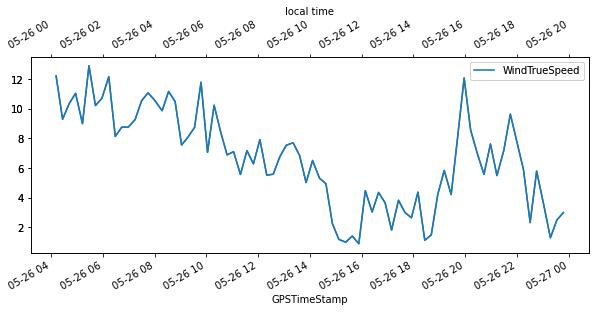

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
ax2 = ax.twiny()
df.plot(x='GPSTimeStamp', y='WindTrueSpeed', ax=ax)
df.plot(x='local time', y='WindTrueSpeed', ax=ax2)
# ax2.xaxis.set_major_formatter(DateFormatter('%d %b %H'))

In [16]:
url2 = 'http://portal.navocean.com/services/nav.php?req=data&id=VELA&columns=GPSTimeStamp%2CLon%2CLat%2CX1+%5Bm+s-1%5D%2CY1+%5Bm+s-1%5D%2CZ1+%5Bm+s-1%5D%2CX2+%5Bm+s-1%5D%2CY2+%5Bm+s-1%5D%2CZ2+%5Bm+s-1%5D%2CX3+%5Bm+s-1%5D%2CY3+%5Bm+s-1%5D%2CZ3+%5Bm+s-1%5D&format=csv&output=file&limit=1000&start=2021-05-26+00%3A00%3A00&end=2021-05-27+00%3A00%3A00&token=5e5c4d86-3fd9-11eb-904e-06ad0ec96835'
df2 = df = sb.get_data(url2)

In [18]:
df2['c_speed'] = np.sqrt(df['X1 [m s-1]']*df['X1 [m s-1]'] + df['Y1 [m s-1]']*df['Y1 [m s-1]'])

(0.0, 1.0)

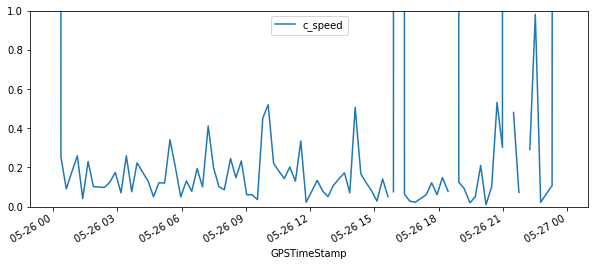

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
ax2 = ax.twiny()
df.plot(x='GPSTimeStamp', y='c_speed', ax=ax)
df.plot(x='local time', y='WindTrueSpeed', ax=ax2)
ax.set_ylim(0,1)